Looking at the skew and kurtosis of sale price

In [1]:
from config_local import local_config  # provides TRAIN_CSV, TEST_CSV, SUBMISSIONS_DIR

import pandas as pd
import numpy as np
from scipy.stats import boxcox, skew, kurtosis
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv(local_config.TRAIN_FILLED_CSV)   # e.g. data/train_filled.csv           
test = pd.read_csv(local_config.TEST_FILLED_CSV)    # e.g. data/test_filled.csv

In [3]:
y_orig = train.SalePrice
y_log = np.log1p(train["SalePrice"])
y_sqrt = np.sqrt(y_orig)

X = train.drop(columns=["SalePrice"])

X_test = test.copy()

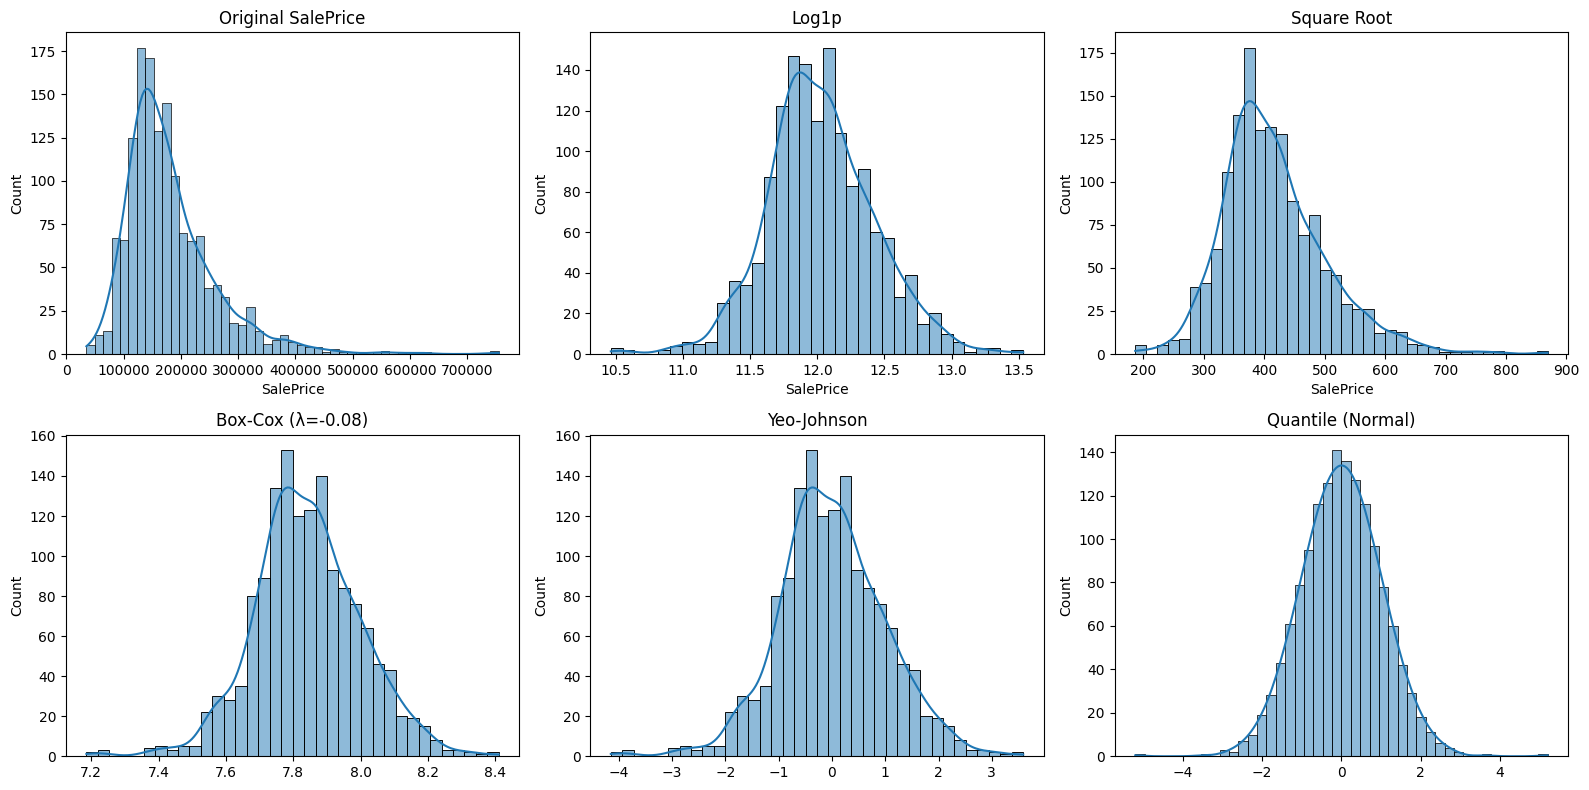

      Transformation  Skewness  Kurtosis
0           Original     1.881     6.510
1              Log1p     0.121     0.803
2        Square Root     0.942     1.947
3  Box-Cox (λ=-0.08)    -0.009     0.871
4        Yeo-Johnson    -0.009     0.871
5           Quantile     0.001     0.711


In [4]:
y_boxcox, lambda_bc = boxcox(y_orig)

# Yeo-Johnson
pt = PowerTransformer(method="yeo-johnson")
y_yeo = pt.fit_transform(y_orig.values.reshape(-1, 1)).flatten()

# Quantile -> normal
qt = QuantileTransformer(output_distribution="normal", random_state=0)
y_quantile = qt.fit_transform(y_orig.values.reshape(-1, 1)).flatten()

# --- Plot ---
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

sns.histplot(y_orig, ax=axes[0,0], kde=True)
axes[0,0].set_title("Original SalePrice")

sns.histplot(y_log, ax=axes[0,1], kde=True)
axes[0,1].set_title("Log1p")

sns.histplot(y_sqrt, ax=axes[0,2], kde=True)
axes[0,2].set_title("Square Root")

sns.histplot(y_boxcox, ax=axes[1,0], kde=True)
axes[1,0].set_title(f"Box-Cox (λ={lambda_bc:.2f})")

sns.histplot(y_yeo, ax=axes[1,1], kde=True)
axes[1,1].set_title("Yeo-Johnson")

sns.histplot(y_quantile, ax=axes[1,2], kde=True)
axes[1,2].set_title("Quantile (Normal)")

plt.tight_layout()
plt.show()

# --- Skewness & Kurtosis ---
stats_df = pd.DataFrame({
    "Transformation": ["Original", "Log1p", "Square Root", f"Box-Cox (λ={lambda_bc:.2f})", "Yeo-Johnson", "Quantile"],
    "Skewness": [
        skew(y_orig), skew(y_log), skew(y_sqrt),
        skew(y_boxcox), skew(y_yeo), skew(y_quantile)
    ],
    "Kurtosis": [
        kurtosis(y_orig), kurtosis(y_log), kurtosis(y_sqrt),
        kurtosis(y_boxcox), kurtosis(y_yeo), kurtosis(y_quantile)
    ]
})

print(stats_df.round(3))